In [4]:
import numpy as np
import pandas as pd
import yfinance as yf

<Axes: >

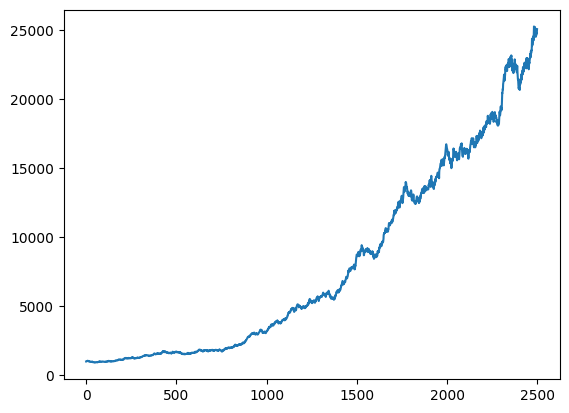

In [72]:
np.random.seed(42)
random_walk = np.random.normal(loc=0.001, scale=0.01, size=2500)
random_walk = pd.Series(random_walk)
random_prices = random_walk.add(1).cumprod()
random_prices.mul(1000).plot()

In [69]:
from datetime import date, timedelta
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=2000)).strftime("%Y-%m-%d")
start_date

'2018-10-23'

In [70]:
tickers = ['HDFCBANK.NS']
symbol = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].to_frame()
symbol.index = pd.to_datetime(symbol.index)
symbol = symbol.rename(columns={'Adj Close': 'PRICE'})

[*********************100%%**********************]  1 of 1 completed


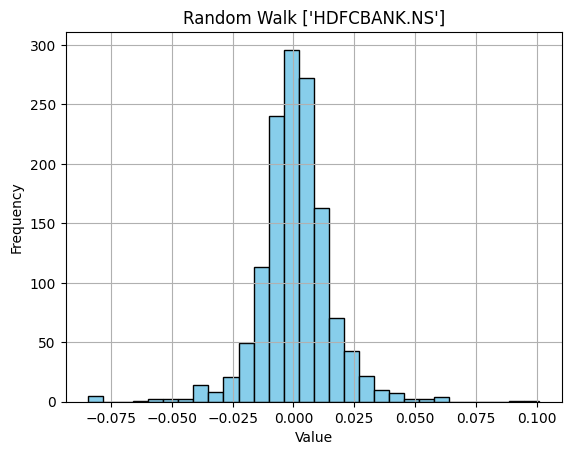

In [71]:
import matplotlib.pyplot as plt

daily_returns = symbol['PRICE'].pct_change().dropna()
n_obs = daily_returns.count()
random_walk = np.random.choice(daily_returns, size=n_obs)
random_walk = pd.Series(random_walk)
plt.hist(random_walk, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Random Walk {tickers}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()